# Predicting Coupon Acceptance On E-Commerce Platform

In [293]:
# importing necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [294]:
# importing the data

df=pd.read_csv('Data.csv')
df

,destination,passanger,weather,temperature,coupon,expiration,gender,age,maritalStatus,has_children,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Accept(Y/N?)
0,No Urgent Place,Alone,Sunny,55,Restaurant(<20),1d,Female,21,Unmarried partner,1,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,Coffee House,2h,Female,21,Unmarried partner,1,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,Carry out & Take away,2h,Female,21,Unmarried partner,1,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,Coffee House,2h,Female,21,Unmarried partner,1,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,Coffee House,1d,Female,21,Unmarried partner,1,...,never,NaN,4~8,1~3,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12679,Home,Partner,Rainy,55,Carry out & Take away,1d,Male,26,Single,0,...,never,1~3,4~8,1~3,1,0,0,1,0,1
12680,Work,Alone,Rainy,55,Carry out & Take away,1d,Male,26,Single,0,...,never,1~3,4~8,1~3,1,0,0,0,1,1
12681,Work,Alone,Snowy,30,Coffee House,1d,Male,26,Single,0,...,never,1~3,4~8,1~3,1,0,0,1,0,0
12682,Work,Alone,Snowy,30,Bar,1d,Male,26,Single,0,...,never,1~3,4~8,1~3,1,1,1,0,1,0


In [295]:
a_1=df[['coupon','Bar','CoffeeHouse','CarryAway','RestaurantLessThan20','Restaurant20To50']]
a_1

,coupon,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50
0,Restaurant(<20),never,never,NaN,4~8,1~3
1,Coffee House,never,never,NaN,4~8,1~3
2,Carry out & Take away,never,never,NaN,4~8,1~3
3,Coffee House,never,never,NaN,4~8,1~3
4,Coffee House,never,never,NaN,4~8,1~3
...,...,...,...,...,...,...
12679,Carry out & Take away,never,never,1~3,4~8,1~3
12680,Carry out & Take away,never,never,1~3,4~8,1~3
12681,Coffee House,never,never,1~3,4~8,1~3
12682,Bar,never,never,1~3,4~8,1~3


# Data Exploration

In [296]:

df.head()

,destination,passanger,weather,temperature,coupon,expiration,gender,age,maritalStatus,has_children,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Accept(Y/N?)
0,No Urgent Place,Alone,Sunny,55,Restaurant(<20),1d,Female,21,Unmarried partner,1,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,Coffee House,2h,Female,21,Unmarried partner,1,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,Carry out & Take away,2h,Female,21,Unmarried partner,1,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,Coffee House,2h,Female,21,Unmarried partner,1,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,Coffee House,1d,Female,21,Unmarried partner,1,...,never,NaN,4~8,1~3,1,1,0,0,1,0


In [297]:
df.tail()

,destination,passanger,weather,temperature,coupon,expiration,gender,age,maritalStatus,has_children,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Accept(Y/N?)
12679,Home,Partner,Rainy,55,Carry out & Take away,1d,Male,26,Single,0,...,never,1~3,4~8,1~3,1,0,0,1,0,1
12680,Work,Alone,Rainy,55,Carry out & Take away,1d,Male,26,Single,0,...,never,1~3,4~8,1~3,1,0,0,0,1,1
12681,Work,Alone,Snowy,30,Coffee House,1d,Male,26,Single,0,...,never,1~3,4~8,1~3,1,0,0,1,0,0
12682,Work,Alone,Snowy,30,Bar,1d,Male,26,Single,0,...,never,1~3,4~8,1~3,1,1,1,0,1,0
12683,Work,Alone,Sunny,80,Restaurant(20-50),2h,Male,26,Single,0,...,never,1~3,4~8,1~3,1,0,0,1,0,0


In [298]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   coupon                12684 non-null  object
 5   expiration            12684 non-null  object
 6   gender                12684 non-null  object
 7   age                   12684 non-null  object
 8   maritalStatus         12684 non-null  object
 9   has_children          12684 non-null  int64 
 10  education             12684 non-null  object
 11  occupation            12684 non-null  object
 12  income                12684 non-null  object
 13  car                   108 non-null    object
 14  Bar                   12577 non-null  object
 15  CoffeeHouse           12467 non-null

In [299]:
print('the shape of the data: ', df.shape)

the shape of the data:  (12684, 25)


In [300]:
df.isna().sum()

destination                 0
passanger                   0
weather                     0
temperature                 0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Accept(Y/N?)                0
dtype: int64

In [301]:
df.dtypes

destination             object
passanger               object
weather                 object
temperature              int64
coupon                  object
expiration              object
gender                  object
age                     object
maritalStatus           object
has_children             int64
education               object
occupation              object
income                  object
car                     object
Bar                     object
CoffeeHouse             object
CarryAway               object
RestaurantLessThan20    object
Restaurant20To50        object
toCoupon_GEQ5min         int64
toCoupon_GEQ15min        int64
toCoupon_GEQ25min        int64
direction_same           int64
direction_opp            int64
Accept(Y/N?)             int64
dtype: object

In [302]:
df.describe(include='all')

,destination,passanger,weather,temperature,coupon,expiration,gender,age,maritalStatus,has_children,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Accept(Y/N?)
count,12684,12684,12684,12684.000000,12684,12684,12684,12684,12684,12684.000000,...,12467,12533,12554,12495,12684.0,12684.000000,12684.000000,12684.000000,12684.000000,12684.000000
unique,3,4,3,NaN,5,2,2,8,5,NaN,...,5,5,5,5,NaN,NaN,NaN,NaN,NaN,NaN
top,No Urgent Place,Alone,Sunny,NaN,Coffee House,1d,Female,21,Married partner,NaN,...,less1,1~3,1~3,less1,NaN,NaN,NaN,NaN,NaN,NaN
freq,6283,7305,10069,NaN,3996,7091,6511,2653,5100,NaN,...,3385,4672,5376,6077,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,63.301798,NaN,NaN,NaN,NaN,NaN,0.414144,...,NaN,NaN,NaN,NaN,1.0,0.561495,0.119126,0.214759,0.785241,0.568433
std,NaN,NaN,NaN,19.154486,NaN,NaN,NaN,NaN,NaN,0.492593,...,NaN,NaN,NaN,NaN,0.0,0.496224,0.323950,0.410671,0.410671,0.495314
min,NaN,NaN,NaN,30.000000,NaN,NaN,NaN,NaN,NaN,0.000000,...,NaN,NaN,NaN,NaN,1.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,NaN,NaN,55.000000,NaN,NaN,NaN,NaN,NaN,0.000000,...,NaN,NaN,NaN,NaN,1.0,0.000000,0.000000,0.000000,1.000000,0.000000
50%,NaN,NaN,NaN,80.000000,NaN,NaN,NaN,NaN,NaN,0.000000,...,NaN,NaN,NaN,NaN,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
75%,NaN,NaN,NaN,80.000000,NaN,NaN,NaN,NaN,NaN,1.000000,...,NaN,NaN,NaN,NaN,1.0,1.000000,0.000000,0.000000,1.000000,1.000000


In [440]:
d=pd.DataFrame(df.skew())
d.columns=['Skewness']
d

,Skewness
temperature,-0.643390
has_children,0.348644
toCoupon_GEQ5min,0.000000
toCoupon_GEQ15min,-0.247890
toCoupon_GEQ25min,2.351805
direction_same,1.389366
direction_opp,-1.389366
Accept(Y/N?),-0.276364


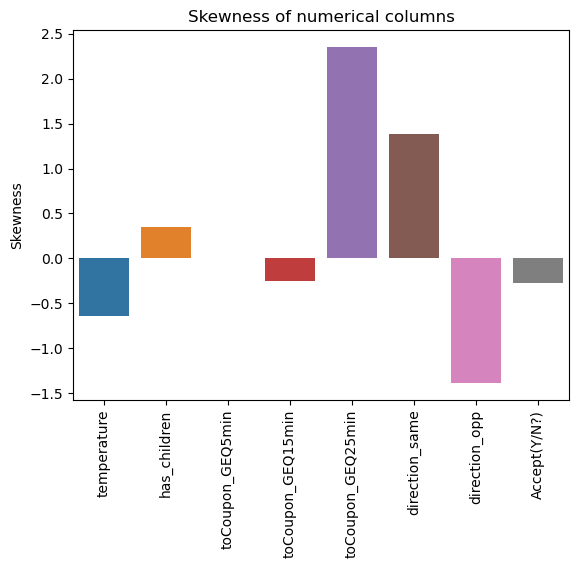

In [445]:
sns.barplot(x=d.index,y=d['Skewness'])
plt.title('Skewness of numerical columns')
plt.xticks(rotation=90)
plt.show()

In [444]:
df.corr()

,temperature,has_children,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Accept(Y/N?)
temperature,1.000000,-0.019716,NaN,-0.155332,-0.216254,0.097085,-0.097085,0.061240
has_children,-0.019716,1.000000,NaN,0.078211,-0.013722,-0.031620,0.031620,-0.045557
toCoupon_GEQ5min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
toCoupon_GEQ15min,-0.155332,0.078211,NaN,1.000000,0.324984,-0.303533,0.303533,-0.081602
toCoupon_GEQ25min,-0.216254,-0.013722,NaN,0.324984,1.000000,-0.192319,0.192319,-0.103633
direction_same,0.097085,-0.031620,NaN,-0.303533,-0.192319,1.000000,-1.000000,0.014570
direction_opp,-0.097085,0.031620,NaN,0.303533,0.192319,-1.000000,1.000000,-0.014570
Accept(Y/N?),0.061240,-0.045557,NaN,-0.081602,-0.103633,0.014570,-0.014570,1.000000


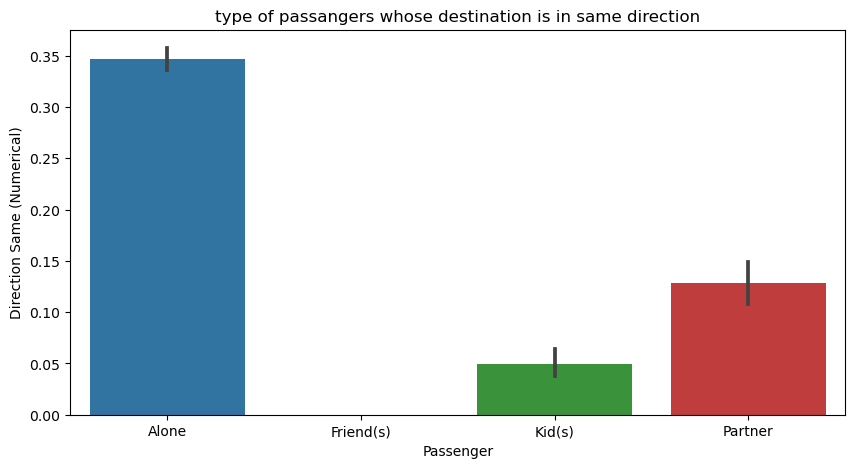

In [303]:
plt.figure(figsize=(10, 5))
sns.barplot(x='passanger', y='direction_same', data=df)
plt.xlabel('Passenger')
plt.ylabel('Direction Same (Numerical)')
plt.title('type of passangers whose destination is in same direction')
plt.show()

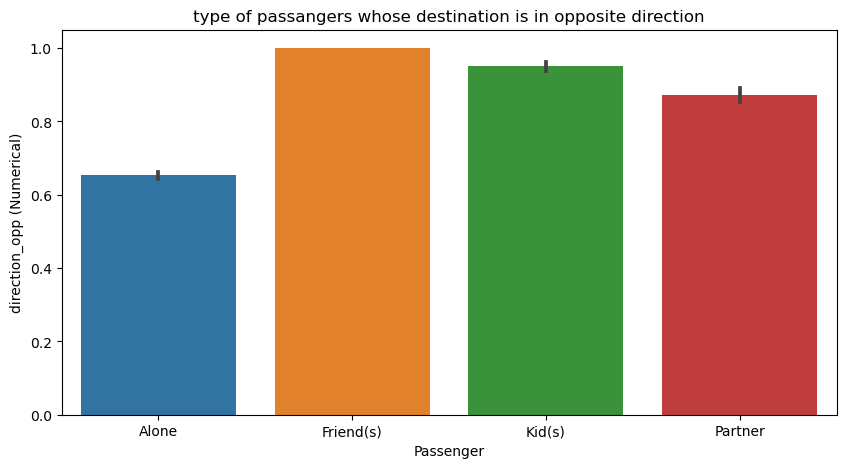

In [304]:
plt.figure(figsize=(10, 5))
sns.barplot(x='passanger', y='direction_opp', data=df)
plt.xlabel('Passenger')
plt.ylabel('direction_opp (Numerical)')
plt.title('type of passangers whose destination is in opposite direction') 
plt.show()

# -----------------------------------------------------------------------------------------------------------

# Pre-Processing

## There are 6 columnns that has missing values 

In [305]:
# destination column
df['destination'].value_counts()

No Urgent Place    6283
Home               3237
Work               3164
Name: destination, dtype: int64

# -----------------------------------------------------------------------------------------------------------

In [306]:
# passanger column
df['passanger'].value_counts()

Alone        7305
Friend(s)    3298
Partner      1075
Kid(s)       1006
Name: passanger, dtype: int64

# -----------------------------------------------------------------------------------------------------------

In [307]:
# weather column
df['weather'].value_counts()

Sunny    10069
Snowy     1405
Rainy     1210
Name: weather, dtype: int64

# -----------------------------------------------------------------------------------------------------------

In [308]:
# temperature column
df['temperature'].value_counts()

80    6528
55    3840
30    2316
Name: temperature, dtype: int64

In [309]:
df['temperature']=df['temperature'].astype(str).astype(int)

# -----------------------------------------------------------------------------------------------------------

In [310]:
# coupan column
df['coupon'].value_counts()

Coffee House             3996
Restaurant(<20)          2786
Carry out & Take away    2393
Bar                      2017
Restaurant(20-50)        1492
Name: coupon, dtype: int64

# -----------------------------------------------------------------------------------------------------------

In [311]:
# expiration column
df['expiration'].value_counts()

1d    7091
2h    5593
Name: expiration, dtype: int64

# -----------------------------------------------------------------------------------------------------------

In [312]:
# gender column
df['gender'].value_counts()

Female    6511
Male      6173
Name: gender, dtype: int64

# -----------------------------------------------------------------------------------------------------------

In [313]:
# age column
df['age'].value_counts()

21         2653
26         2559
31         2039
50plus     1788
36         1319
41         1093
46          686
below21     547
Name: age, dtype: int64

# -----------------------------------------------------------------------------------------------------------

In [314]:
# maritalStatus column
df['maritalStatus'].value_counts()

Married partner      5100
Single               4752
Unmarried partner    2186
Divorced              516
Widowed               130
Name: maritalStatus, dtype: int64

# -----------------------------------------------------------------------------------------------------------

In [315]:
# has_children column
df['has_children'].value_counts()

0    7431
1    5253
Name: has_children, dtype: int64

# -----------------------------------------------------------------------------------------------------------

In [316]:
# education column
df['education'].value_counts()

Some college - no degree                  4351
Bachelors degree                          4335
Graduate degree (Masters or Doctorate)    1852
Associates degree                         1153
High School Graduate                       905
Some High School                            88
Name: education, dtype: int64

# -----------------------------------------------------------------------------------------------------------

In [317]:
# occupation column
df['occupation'].value_counts()

Unemployed                                   1870
Student                                      1584
Computer & Mathematical                      1408
Sales & Related                              1093
Education&Training&Library                    943
Management                                    838
Office & Administrative Support               639
Arts Design Entertainment Sports & Media      629
Business & Financial                          544
Retired                                       495
Food Preparation & Serving Related            298
Healthcare Practitioners & Technical          244
Healthcare Support                            242
Community & Social Services                   241
Legal                                         219
Transportation & Material Moving              218
Architecture & Engineering                    175
Personal Care & Service                       175
Protective Service                            175
Life Physical Social Science                  170


# -----------------------------------------------------------------------------------------------------------

In [318]:
# income column
df['income'].value_counts()

$25000 - $37499     2013
$12500 - $24999     1831
$37500 - $49999     1805
$100000 or More     1736
$50000 - $62499     1659
Less than $12500    1042
$87500 - $99999      895
$75000 - $87499      857
$62500 - $74999      846
Name: income, dtype: int64

# -----------------------------------------------------------------------------------------------------------

In [319]:
# car column
df['car'].value_counts()

Scooter and motorcycle                      22
Mazda5                                      22
do not drive                                22
crossover                                   21
Car that is too old to install Onstar :D    21
Name: car, dtype: int64

In [320]:
# the car column has 12576 null values and there is no other column from which we can analyze and fill these null values, 
# hence it is better to drop the column.
df.drop(columns='car',axis=1,inplace=True)

# -----------------------------------------------------------------------------------------------------------

In [321]:
# Bar column
# the bar column has 107 null values
df['Bar'].value_counts()

never    5197
less1    3482
1~3      2473
4~8      1076
gt8       349
Name: Bar, dtype: int64

In [322]:
df['Bar'].isna().sum()

107

In [323]:
# using the heighest occured values to fill the null data
value_1=['never','less1']
fill_value_1=np.random.choice(len(value_1),df['Bar'].isna().sum())
df.loc[df['Bar'].isna(),'Bar']=[value_1[i] for i in fill_value_1]


# -----------------------------------------------------------------------------------------------------------

In [324]:
# CoffeeHouse column
# the CoffeeHouse column has 217 null values
df['CoffeeHouse'].value_counts()

less1    3385
1~3      3225
never    2962
4~8      1784
gt8      1111
Name: CoffeeHouse, dtype: int64

In [325]:
df['CoffeeHouse'].isna().sum()

217

In [326]:
# using the heighest occured values to fill the null data
value_2=['never','less1','1~3']
fill_value_2=np.random.choice(len(value_2),df['CoffeeHouse'].isna().sum())
df.loc[df['CoffeeHouse'].isna(),'CoffeeHouse']=[value_2[i] for i in fill_value_2]

# -----------------------------------------------------------------------------------------------------------

In [327]:
# CarryAway column
# the CarryAway column has 151 null values
df['CarryAway'].value_counts()

1~3      4672
4~8      4258
less1    1856
gt8      1594
never     153
Name: CarryAway, dtype: int64

In [328]:
df['CarryAway'].isna().sum()

151

In [329]:
# using the heighest occured values to fill the null data
value_3=['1~3','4~8']
fill_value_3=np.random.choice(len(value_3),df['CarryAway'].isna().sum())
df.loc[df['CarryAway'].isna(),'CarryAway']=[value_3[i] for i in fill_value_3]

# -----------------------------------------------------------------------------------------------------------

In [330]:
# RestaurantLessThan20 column
# the RestaurantLessThan20 has 130 null values
df['RestaurantLessThan20'].value_counts()

1~3      5376
4~8      3580
less1    2093
gt8      1285
never     220
Name: RestaurantLessThan20, dtype: int64

In [331]:
df['RestaurantLessThan20'].isna().sum()

130

In [332]:
# using the heighest occured values to fill the null data
value_4=['1~3','4~8']
fill_value_4=np.random.choice(len(value_4),df['RestaurantLessThan20'].isna().sum())
df.loc[df['RestaurantLessThan20'].isna(),'RestaurantLessThan20']=[value_4[i] for i in fill_value_4]

# -----------------------------------------------------------------------------------------------------------

In [333]:
# Restaurant20To50 column
# the Restaurant20To50 has 189 null values
df['Restaurant20To50'].value_counts()

less1    6077
1~3      3290
never    2136
4~8       728
gt8       264
Name: Restaurant20To50, dtype: int64

In [334]:
df['Restaurant20To50'].isna().sum()

189

In [335]:
# using the heighest occured values to fill the null data
value_5=['less1','1~3']
fill_value_5=np.random.choice(len(value_5),df['Restaurant20To50'].isna().sum())
df.loc[df['Restaurant20To50'].isna(),'Restaurant20To50']=[value_5[i] for i in fill_value_5]

# -----------------------------------------------------------------------------------------------------------

In [336]:
# toCoupon_GEQ5min column
df['toCoupon_GEQ5min'].value_counts()

1    12684
Name: toCoupon_GEQ5min, dtype: int64

# -----------------------------------------------------------------------------------------------------------

In [337]:
# toCoupon_GEQ15min column
df['toCoupon_GEQ15min'].value_counts()

1    7122
0    5562
Name: toCoupon_GEQ15min, dtype: int64

# -----------------------------------------------------------------------------------------------------------

In [338]:
# toCoupon_GEQ25min column
df['toCoupon_GEQ25min'].value_counts()

0    11173
1     1511
Name: toCoupon_GEQ25min, dtype: int64

# -----------------------------------------------------------------------------------------------------------

In [339]:
# direction_same column
df['direction_same'].value_counts()

0    9960
1    2724
Name: direction_same, dtype: int64

# -----------------------------------------------------------------------------------------------------------

In [340]:
# direction_opp column
df['direction_opp'].value_counts()

1    9960
0    2724
Name: direction_opp, dtype: int64

# -----------------------------------------------------------------------------------------------------------

In [341]:
df.dtypes

destination             object
passanger               object
weather                 object
temperature              int32
coupon                  object
expiration              object
gender                  object
age                     object
maritalStatus           object
has_children             int64
education               object
occupation              object
income                  object
Bar                     object
CoffeeHouse             object
CarryAway               object
RestaurantLessThan20    object
Restaurant20To50        object
toCoupon_GEQ5min         int64
toCoupon_GEQ15min        int64
toCoupon_GEQ25min        int64
direction_same           int64
direction_opp            int64
Accept(Y/N?)             int64
dtype: object

# Checking for outliers

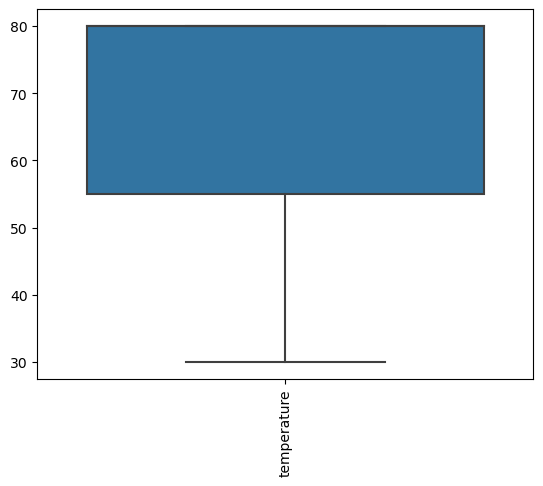

In [342]:
sns.boxplot(data=df[['temperature','expiration','age','income']])
plt.xticks(rotation=90)
plt.show()

In [343]:
# IQR method
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

# Define a threshold for outliers
threshold = 1.5

# Identify outliers
outliers = ((df < (Q1 - threshold * IQR)) | df > (Q3 + threshold * IQR)).any(axis=1)

In [344]:
outliers.value_counts()

False    8449
True     4235
dtype: int64

# Feature Engineering

### splitting the data for training, testing and using encoding techinique to convert object column into numerical columns
### using category encoders to convert the categorical columns


In [345]:
l=[]
for i in df.columns:
    l.append(i)
print(l)

['destination', 'passanger', 'weather', 'temperature', 'coupon', 'expiration', 'gender', 'age', 'maritalStatus', 'has_children', 'education', 'occupation', 'income', 'Bar', 'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50', 'toCoupon_GEQ5min', 'toCoupon_GEQ15min', 'toCoupon_GEQ25min', 'direction_same', 'direction_opp', 'Accept(Y/N?)']


In [346]:
x=df[['destination', 'passanger', 'weather', 'temperature', 'coupon', 'expiration', 'gender', 'age', 'maritalStatus', 'has_children', 'education', 'occupation','income', 'Bar', 'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50', 'toCoupon_GEQ5min', 'toCoupon_GEQ15min', 'toCoupon_GEQ25min', 'direction_same', 'direction_opp']]
y=df['Accept(Y/N?)']

In [347]:
x

,destination,passanger,weather,temperature,coupon,expiration,gender,age,maritalStatus,has_children,...,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp
0,No Urgent Place,Alone,Sunny,55,Restaurant(<20),1d,Female,21,Unmarried partner,1,...,never,never,4~8,4~8,1~3,1,0,0,0,1
1,No Urgent Place,Friend(s),Sunny,80,Coffee House,2h,Female,21,Unmarried partner,1,...,never,never,4~8,4~8,1~3,1,0,0,0,1
2,No Urgent Place,Friend(s),Sunny,80,Carry out & Take away,2h,Female,21,Unmarried partner,1,...,never,never,1~3,4~8,1~3,1,1,0,0,1
3,No Urgent Place,Friend(s),Sunny,80,Coffee House,2h,Female,21,Unmarried partner,1,...,never,never,4~8,4~8,1~3,1,1,0,0,1
4,No Urgent Place,Friend(s),Sunny,80,Coffee House,1d,Female,21,Unmarried partner,1,...,never,never,1~3,4~8,1~3,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12679,Home,Partner,Rainy,55,Carry out & Take away,1d,Male,26,Single,0,...,never,never,1~3,4~8,1~3,1,0,0,1,0
12680,Work,Alone,Rainy,55,Carry out & Take away,1d,Male,26,Single,0,...,never,never,1~3,4~8,1~3,1,0,0,0,1
12681,Work,Alone,Snowy,30,Coffee House,1d,Male,26,Single,0,...,never,never,1~3,4~8,1~3,1,0,0,1,0
12682,Work,Alone,Snowy,30,Bar,1d,Male,26,Single,0,...,never,never,1~3,4~8,1~3,1,1,1,0,1


In [348]:
pip install category_encoders

In [349]:
import category_encoders as ce

In [350]:
encoders=ce.OneHotEncoder(cols=['destination','passanger','weather','coupon','expiration','gender','age','maritalStatus','education','occupation','income','Bar','CoffeeHouse','CarryAway','RestaurantLessThan20','Restaurant20To50'])
x=encoders.fit_transform(x)


In [351]:
x

,destination_1,destination_2,destination_3,passanger_1,passanger_2,passanger_3,passanger_4,weather_1,weather_2,weather_3,...,Restaurant20To50_1,Restaurant20To50_2,Restaurant20To50_3,Restaurant20To50_4,Restaurant20To50_5,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp
0,1,0,0,1,0,0,0,1,0,0,...,1,0,0,0,0,1,0,0,0,1
1,1,0,0,0,1,0,0,1,0,0,...,1,0,0,0,0,1,0,0,0,1
2,1,0,0,0,1,0,0,1,0,0,...,1,0,0,0,0,1,1,0,0,1
3,1,0,0,0,1,0,0,1,0,0,...,1,0,0,0,0,1,1,0,0,1
4,1,0,0,0,1,0,0,1,0,0,...,1,0,0,0,0,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12679,0,1,0,0,0,0,1,0,1,0,...,1,0,0,0,0,1,0,0,1,0
12680,0,0,1,1,0,0,0,0,1,0,...,1,0,0,0,0,1,0,0,0,1
12681,0,0,1,1,0,0,0,0,0,1,...,1,0,0,0,0,1,0,0,1,0
12682,0,0,1,1,0,0,0,0,0,1,...,1,0,0,0,0,1,1,1,0,1


In [352]:
from sklearn.model_selection import train_test_split

In [353]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=101)

# 1.Using logistic regression to predict the values

In [354]:
from sklearn.linear_model import LogisticRegression

In [355]:
lr=LogisticRegression()

In [356]:
lr.fit(x_train,y_train)

LogisticRegression()

In [357]:
lr_prediction=lr.predict(x_test)

In [358]:
# Accuracy score 
from sklearn.metrics import accuracy_score

In [359]:
print('test accuracy score: {:.4f}'.format(accuracy_score(y_test,lr_prediction)))

test accuracy score: 0.6815


In [360]:
# Confusion matrics
from sklearn.metrics import confusion_matrix

In [361]:
cm=confusion_matrix
matrix_1=cm(y_test,lr_prediction)
print(matrix_1)

[[ 595  464]
 [ 344 1134]]


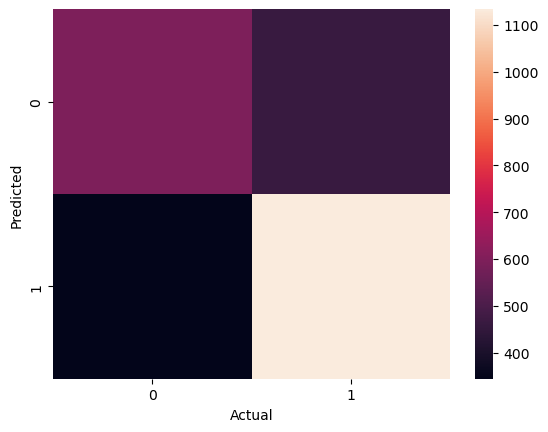

In [362]:
sns.heatmap(matrix_1)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

In [363]:
# Classification Report
from sklearn.metrics import classification_report
report_1=classification_report(y_test,lr_prediction)
print(report_1)

              precision    recall  f1-score   support

           0       0.63      0.56      0.60      1059
           1       0.71      0.77      0.74      1478

    accuracy                           0.68      2537
   macro avg       0.67      0.66      0.67      2537
weighted avg       0.68      0.68      0.68      2537



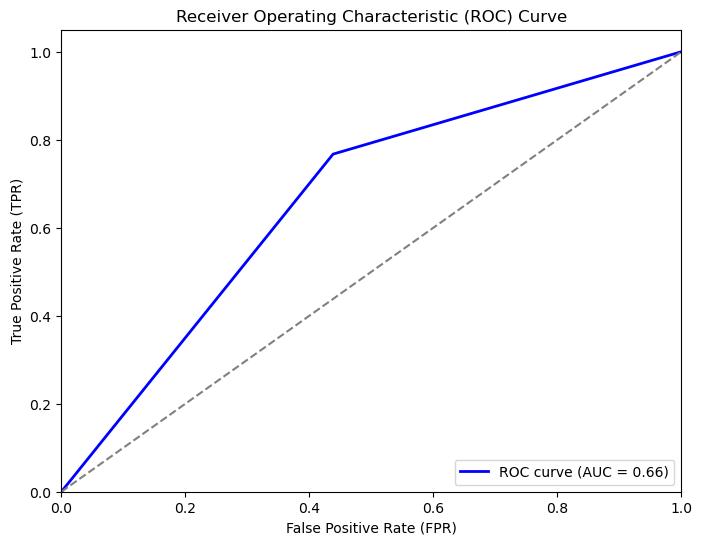

In [364]:
# AUC ROC curve
from sklearn.metrics import roc_auc_score, roc_curve

auc_roc = roc_auc_score(y_test,lr_prediction)
fpr, tpr, _ = roc_curve(y_test, lr_prediction)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = {:.2f})'.format(auc_roc))
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# 2.Using Decision Tree to predict the values

In [365]:
from sklearn.tree import DecisionTreeClassifier

## 2.1 Gini Index

In [366]:
gini=DecisionTreeClassifier(criterion='gini',max_depth=5,random_state=101)

In [367]:
gini.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=5, random_state=101)

In [368]:
gini_prediction=gini.predict(x_test)

In [369]:
# Accuracy Score
print('test accuracy score: {:.4f}'.format(accuracy_score(y_test,gini_prediction)))

test accuracy score: 0.6744


In [370]:
# Confusion matrix
matrix_2=cm(y_test,gini_prediction)
print(matrix_2)

[[ 445  614]
 [ 212 1266]]


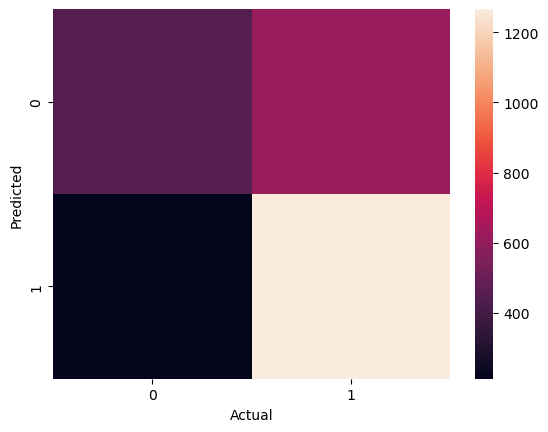

In [371]:
sns.heatmap(matrix_2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

In [372]:
# Classification Report
report_2=classification_report(y_test,gini_prediction)
print(report_2)

              precision    recall  f1-score   support

           0       0.68      0.42      0.52      1059
           1       0.67      0.86      0.75      1478

    accuracy                           0.67      2537
   macro avg       0.68      0.64      0.64      2537
weighted avg       0.68      0.67      0.66      2537



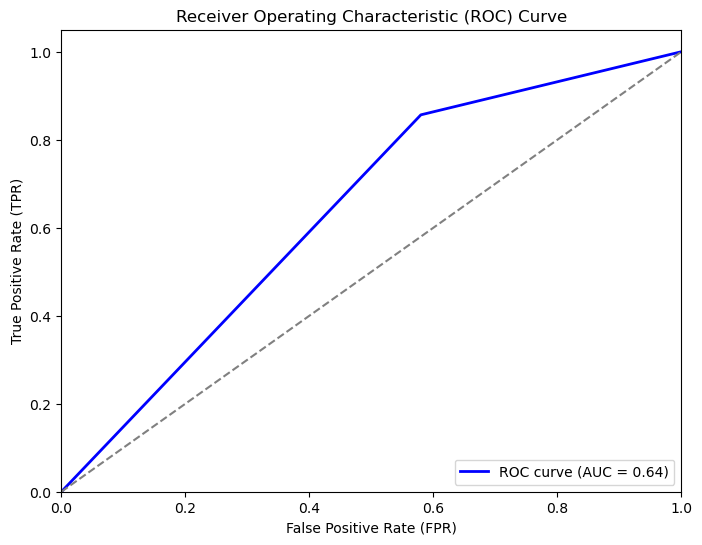

In [373]:
# AUC ROC curve

auc_roc = roc_auc_score(y_test,gini_prediction)
fpr, tpr, _ = roc_curve(y_test, gini_prediction)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = {:.2f})'.format(auc_roc))
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

## 2.2 Entropy

In [374]:
entropy=DecisionTreeClassifier(criterion='entropy',max_depth=5,random_state=100)

In [375]:
entropy.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=100)

In [376]:
entropy_prediction=entropy.predict(x_test)

In [377]:
# Accuracy Score
print('test accuracy score: {:.4f}'.format(accuracy_score(y_test,entropy_prediction)))

test accuracy score: 0.6744


In [378]:
# Confusion matrix
matrix_3=cm(y_test,entropy_prediction)
print(matrix_3)

[[ 447  612]
 [ 214 1264]]


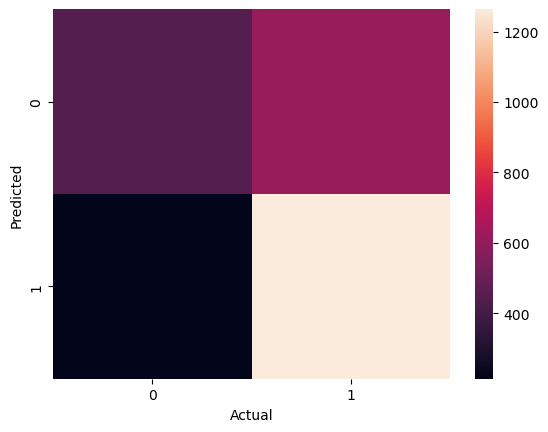

In [379]:
sns.heatmap(matrix_3)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

In [380]:
# Classification Report
report_3=classification_report(y_test,entropy_prediction)
print(report_3)

              precision    recall  f1-score   support

           0       0.68      0.42      0.52      1059
           1       0.67      0.86      0.75      1478

    accuracy                           0.67      2537
   macro avg       0.68      0.64      0.64      2537
weighted avg       0.67      0.67      0.66      2537



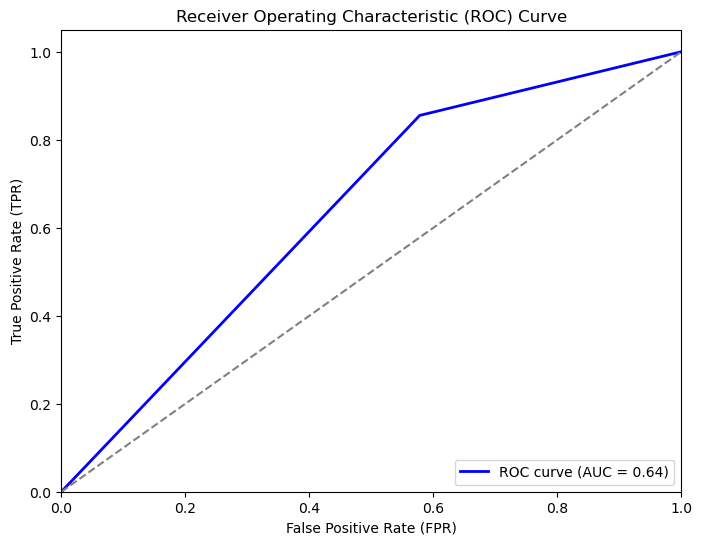

In [381]:
# AUC ROC curve

auc_roc = roc_auc_score(y_test,entropy_prediction)
fpr, tpr, _ = roc_curve(y_test,entropy_prediction)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = {:.2f})'.format(auc_roc))
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# 3.Using K Nearest Neighbor to predict the values

In [382]:
from sklearn.neighbors import KNeighborsClassifier

In [383]:
knn=KNeighborsClassifier(n_neighbors=5)

In [384]:
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [385]:
knn_prediction=knn.predict(x_test)

In [386]:
# Accuracy Score
print('test accuracy score: {:.4f}'.format(accuracy_score(y_test,knn_prediction)))

test accuracy score: 0.6598


In [387]:
# Confusion matrix
matrix_4=cm(y_test,knn_prediction)
print(matrix_4)

[[ 612  447]
 [ 416 1062]]


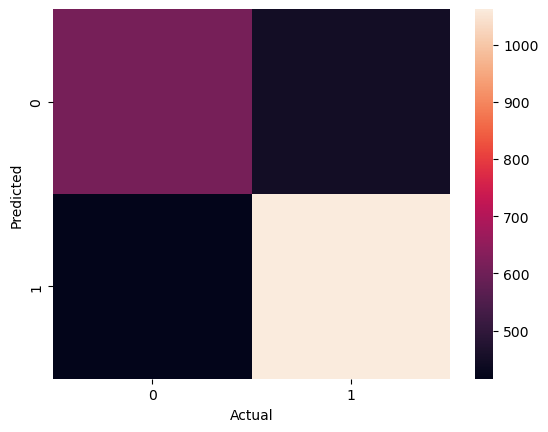

In [388]:
sns.heatmap(matrix_4)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

In [389]:
# Classification Report
report_4=classification_report(y_test,knn_prediction)
print(report_4)

              precision    recall  f1-score   support

           0       0.60      0.58      0.59      1059
           1       0.70      0.72      0.71      1478

    accuracy                           0.66      2537
   macro avg       0.65      0.65      0.65      2537
weighted avg       0.66      0.66      0.66      2537



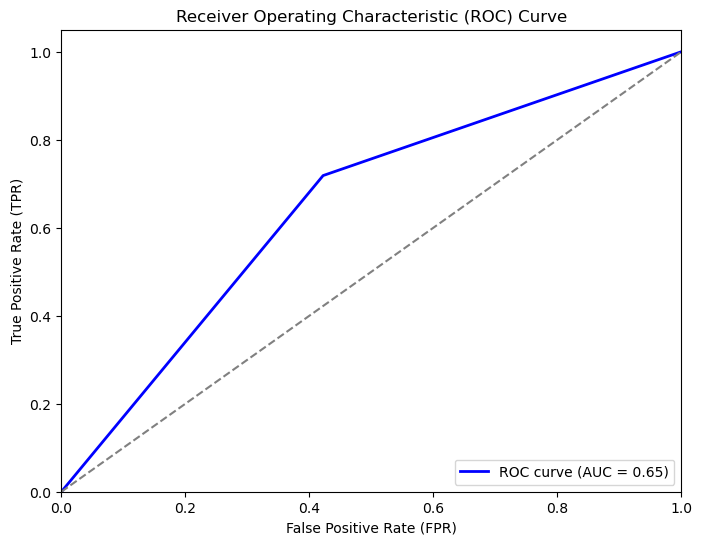

In [390]:
# AUC ROC curve

auc_roc = roc_auc_score(y_test,knn_prediction)
fpr, tpr, _ = roc_curve(y_test,knn_prediction)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = {:.2f})'.format(auc_roc))
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# 4. Using Random Forest to predict the values

In [391]:
from sklearn.ensemble import RandomForestClassifier

In [392]:
rfc=RandomForestClassifier(n_estimators=100,random_state=42)

In [393]:
rfc.fit(x_train,y_train)

RandomForestClassifier(random_state=42)

In [394]:
rfc_prediction=rfc.predict(x_test)

In [395]:
# Accuracy Score
print('test accuracy score: {:.4f}'.format(accuracy_score(y_test,rfc_prediction)))

test accuracy score: 0.7576


In [396]:
# Confusion matrix
matrix_5=cm(y_test,rfc_prediction)
print(matrix_5)

[[ 706  353]
 [ 262 1216]]


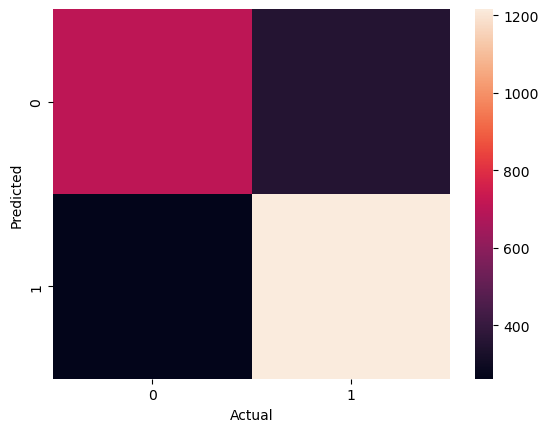

In [397]:
sns.heatmap(matrix_5)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

In [398]:
# Classification Report
report_5=classification_report(y_test,rfc_prediction)
print(report_5)

              precision    recall  f1-score   support

           0       0.73      0.67      0.70      1059
           1       0.78      0.82      0.80      1478

    accuracy                           0.76      2537
   macro avg       0.75      0.74      0.75      2537
weighted avg       0.76      0.76      0.76      2537



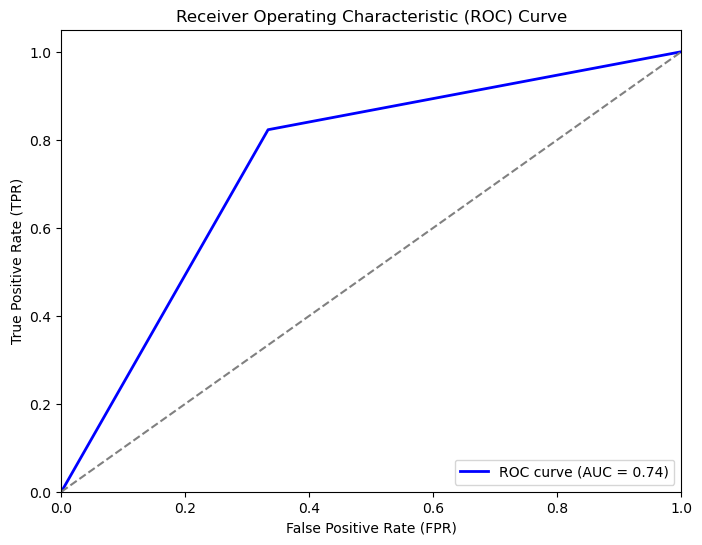

In [399]:
# AUC ROC curve

auc_roc = roc_auc_score(y_test,rfc_prediction)
fpr, tpr, _ = roc_curve(y_test,rfc_prediction)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = {:.2f})'.format(auc_roc))
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [400]:
# predicting training values
rfc_prediction_1=rfc.predict(x_train)

# Accuracy Score
print('test accuracy score: {:.4f}'.format(accuracy_score(y_train,rfc_prediction_1)))

test accuracy score: 0.9929


# 5. Using Naive Bayes to predict the values

In [401]:
from sklearn.naive_bayes import GaussianNB

In [402]:
nb=GaussianNB()

In [403]:
nb.fit(x_train,y_train)

GaussianNB()

In [404]:
nb_prediction=nb.predict(x_test)

In [405]:
# Accuracy Score
print('test accuracy score: {:.4f}'.format(accuracy_score(y_test,nb_prediction)))

test accuracy score: 0.6283


In [406]:
# Confusion matrix
matrix_6=cm(y_test,nb_prediction)
print(matrix_6)

[[687 372]
 [571 907]]


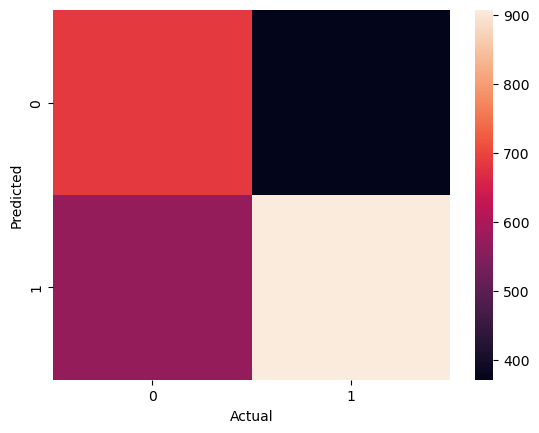

In [407]:
sns.heatmap(matrix_6)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

In [408]:
# Classification Report
report_6=classification_report(y_test,nb_prediction)
print(report_6)

              precision    recall  f1-score   support

           0       0.55      0.65      0.59      1059
           1       0.71      0.61      0.66      1478

    accuracy                           0.63      2537
   macro avg       0.63      0.63      0.63      2537
weighted avg       0.64      0.63      0.63      2537



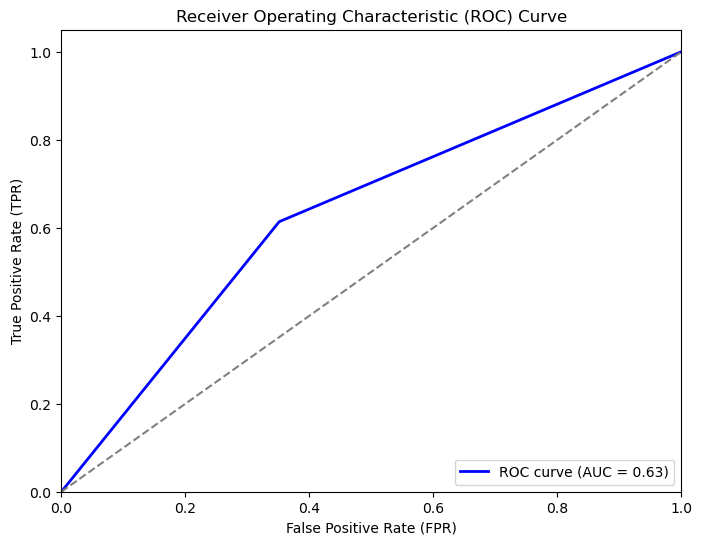

In [409]:
# AUC ROC curve

auc_roc = roc_auc_score(y_test,nb_prediction)
fpr, tpr, _ = roc_curve(y_test,nb_prediction)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = {:.2f})'.format(auc_roc))
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# 6. using XGBoost to predict the values

In [410]:
pip install xgboost

In [411]:
import xgboost as xgb

In [412]:
clf = xgb.XGBClassifier(objective='binary:logistic', random_state=52)
clf.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=52, ...)

In [413]:
clf_prediction=clf.predict(x_test)

In [414]:
# Accuracy Score
print('test accuracy score: {:.4f}'.format(accuracy_score(y_test,clf_prediction)))

test accuracy score: 0.7635


In [415]:
# Confusion matrix
matrix_7=cm(y_test,clf_prediction)
print(matrix_7)

[[ 708  351]
 [ 249 1229]]


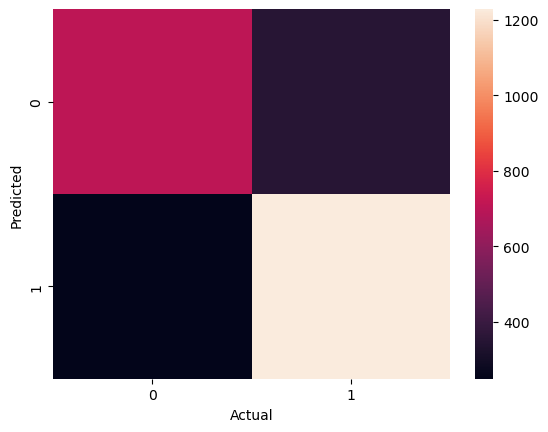

In [416]:
sns.heatmap(matrix_7)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

In [417]:
# Classification Report
report_7=classification_report(y_test,clf_prediction)
print(report_7)

              precision    recall  f1-score   support

           0       0.74      0.67      0.70      1059
           1       0.78      0.83      0.80      1478

    accuracy                           0.76      2537
   macro avg       0.76      0.75      0.75      2537
weighted avg       0.76      0.76      0.76      2537



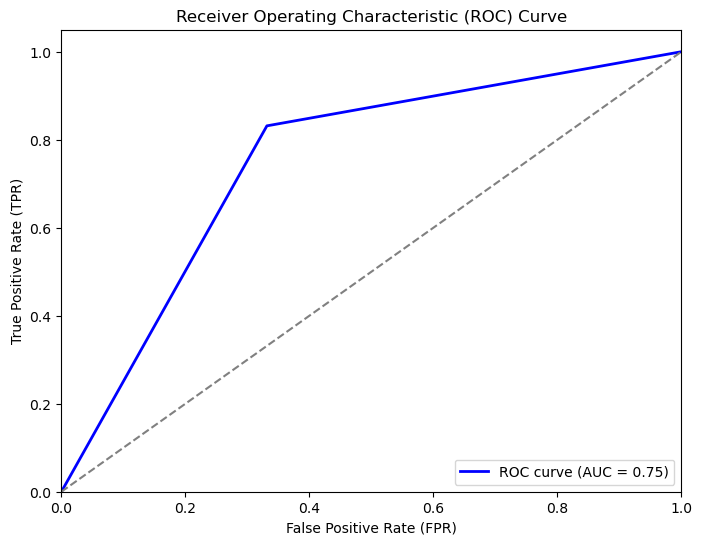

In [418]:
# AUC ROC curve

auc_roc = roc_auc_score(y_test,clf_prediction)
fpr, tpr, _ = roc_curve(y_test,clf_prediction)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = {:.2f})'.format(auc_roc))
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [419]:
# predicting training values
clf_prediction_1=clf.predict(x_train)

# Accuracy Score
print('test accuracy score: {:.4f}'.format(accuracy_score(y_train,clf_prediction_1)))

test accuracy score: 0.8961


# 7. using LightBGM to predict the values

In [420]:
pip install lightgbm


In [421]:
import lightgbm as lgb

In [422]:
bgm = lgb.LGBMClassifier()
bgm.fit(x_train, y_train)

[LightGBM] [Info] Number of positive: 5732, number of negative: 4415
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002049 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 208
[LightGBM] [Info] Number of data points in the train set: 10147, number of used features: 103
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.564896 -> initscore=0.261057
[LightGBM] [Info] Start training from score 0.261057


LGBMClassifier()

In [423]:
bgm_prediction=bgm.predict(x_test)

In [424]:
# Accuracy Score
print('test accuracy score: {:.4f}'.format(accuracy_score(y_test,bgm_prediction)))

test accuracy score: 0.7592


In [425]:
# Confusion matrix
matrix_8=cm(y_test,bgm_prediction)
print(matrix_8)

[[ 677  382]
 [ 229 1249]]


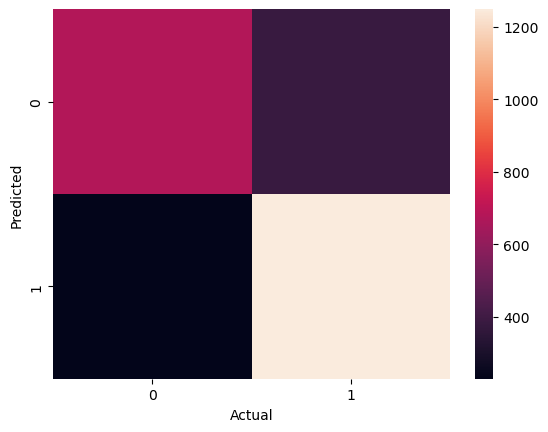

In [426]:
sns.heatmap(matrix_8)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

In [427]:
# Classification Report
report_8=classification_report(y_test,bgm_prediction)
print(report_8)

              precision    recall  f1-score   support

           0       0.75      0.64      0.69      1059
           1       0.77      0.85      0.80      1478

    accuracy                           0.76      2537
   macro avg       0.76      0.74      0.75      2537
weighted avg       0.76      0.76      0.76      2537



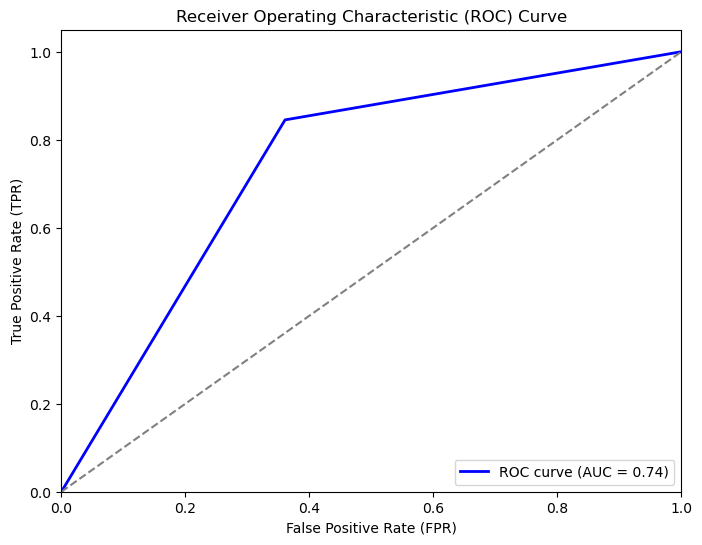

In [428]:
# AUC ROC curve

auc_roc = roc_auc_score(y_test,bgm_prediction)
fpr, tpr, _ = roc_curve(y_test,bgm_prediction)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = {:.2f})'.format(auc_roc))
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [429]:
# predicting training values
bgm_prediction_1=bgm.predict(x_train)

# Accuracy Score
print('test accuracy score: {:.4f}'.format(accuracy_score(y_train,bgm_prediction_1)))

test accuracy score: 0.8186


In [430]:
# Comparing the Models Based on Accuracy Score

In [446]:
accuracy_scores = {
    'Accuracy_Score':[ accuracy_score(y_test, lr_prediction),
     accuracy_score(y_test, gini_prediction),
     accuracy_score(y_test, entropy_prediction),
     accuracy_score(y_test, knn_prediction),
     accuracy_score(y_test,rfc_prediction),
     accuracy_score(y_test, nb_prediction),
     accuracy_score(y_test, clf_prediction),
     accuracy_score(y_test, bgm_prediction)],
    'ROC curve (AUC)':[0.66,0.64,0.64,0.65,0.74,0.63,0.75,0.74],
    'Avg F1-Score':[0.67,0.64,0.64,0.65,0.75,0.63,0.75,0.75]
}


In [447]:
data=pd.DataFrame(accuracy_scores)
data.index=['Logistic Regression','Decision Tree Gini Index','Decision Tree Entropy','K Nearest Neighbors','Random Forest','Naive Bayes','eXtreme Gradient Boosting','Light Gradient Boosting Machine']
data

,Accuracy_Score,ROC curve (AUC),Avg F1-Score
Logistic Regression,0.681514,0.66,0.67
Decision Tree Gini Index,0.674419,0.64,0.64
Decision Tree Entropy,0.674419,0.64,0.64
K Nearest Neighbors,0.659834,0.65,0.65
Random Forest,0.757588,0.74,0.75
Naive Bayes,0.628301,0.63,0.63
eXtreme Gradient Boosting,0.763500,0.75,0.75
Light Gradient Boosting Machine,0.759164,0.74,0.75


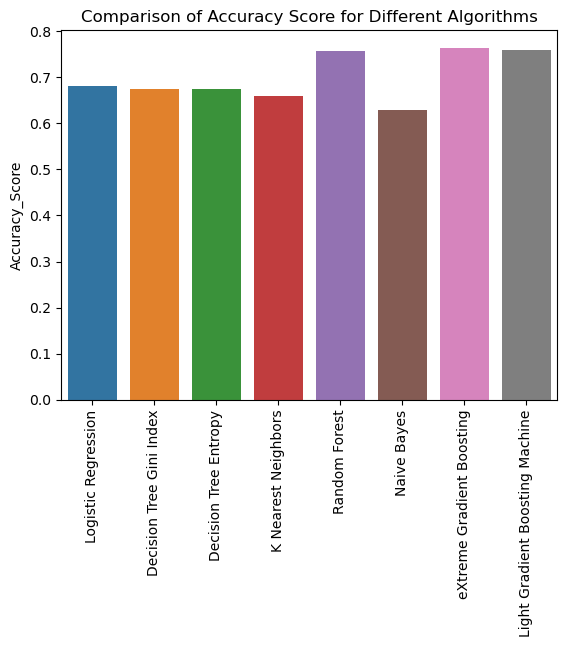

In [448]:
sns.barplot(x=data.index,y=data['Accuracy_Score'])
plt.title('Comparison of Accuracy Score for Different Algorithms')
plt.xticks(rotation=90)
plt.show()

# Conclusion

### 1.Gradient Boosting Models Perform Well: Both eXtreme Gradient Boosting (XGBoost) and Light Gradient Boosting Machine (LightGBM) achieved high accuracy scores of approximately 0.77 and 0.76, respectively. These models outperformed other algorithms in terms of predictive accuracy.

### 2.Random Forest Shows Strong Performance: Random Forest also demonstrated strong performance with an accuracy score of around 0.76. It performed comparably well to the gradient boosting models.

### 3.Logistic Regression and Decision Trees: Logistic Regression and Decision Trees, whether using Gini Index or Entropy, achieved similar accuracy scores around 0.68. While these scores are lower compared to ensemble methods, they still offer respectable performance.

### 4.K Nearest Neighbors and Naive Bayes: K Nearest Neighbors (KNN) and Naive Bayes exhibited lower accuracy scores compared to other models, with scores around 0.66 and 0.63, respectively. These models may require further optimization or may not be well-suited for the given dataset.

### 5.Consider Model Complexity: Gradient boosting models and Random Forest achieved higher accuracy, but they are generally more complex and may require more computational resources compared to simpler models like Logistic Regression and Decision Trees.